숙제 : k겹교차검증이나 붓스트랩샘플링 그런것들 개념 적어두기 + 성능평가 해보았다. 이런식으로 문서 작성 

숙제2 : 하이퍼 파라미터 찾기 그리드 서치 이런걸로 코드구현 + 이걸 엑셀 그래프로 c값에 따른 시각화 

In [26]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [27]:
training_data = pd.read_csv('C:/Users/유재림/Desktop/ML23_2-main/archive/fashion-mnist_train.csv')
train_y = training_data['label']
train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('C:/Users/유재림/Desktop/ML23_2-main/archive/fashion-mnist_test.csv')
test_y = test_data['label']
test_X = test_data.drop('label',axis=1)


#label

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [28]:
count = [0 for i in range(0 , 10)]

for i in range(0,60000):
    count[train_y[i]] += 1

# y값이 분포가 정확히 일치하는 것을 확인 
print(count) 

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


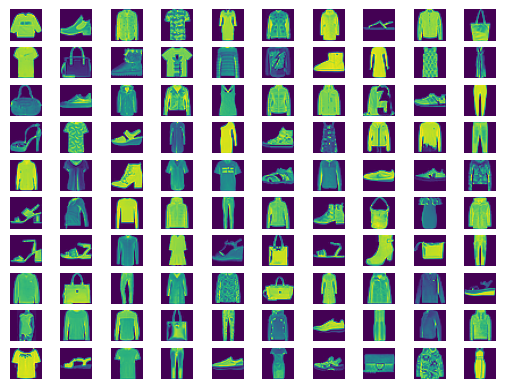

In [29]:
import matplotlib.pyplot as plt

# Assuming train_X is your image dataset and train_y is the corresponding labels
for i in range(100):
    sample_image = train_X.iloc[i].values.reshape(28, 28)  # Assuming 28x28 grayscale images
    
    plt.subplot(10, 10, i+1)  # Creating a subplot grid with 10 rows and 10 columns
    plt.imshow(sample_image, cmap='viridis')  # Use any colormap suitable for a single channel image
    # plt.title(f'{train_y.iloc[i]}')
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

# 이미지를 바꾼건 아니고 show형식만 바꿔서 쓸 때는 이런식으로 씀 

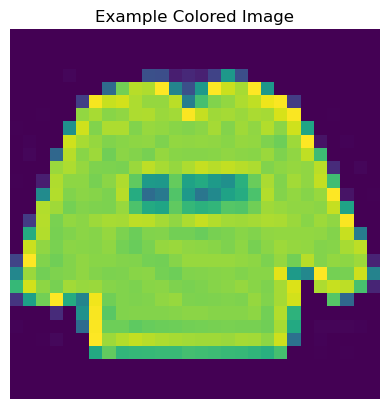

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_X is your image dataset
new_dataX = []

for i in range(len(train_X)):
    # Assuming each image has dimensions 28x28
    sample_image = train_X.iloc[i].values.reshape(28, 28)
    
    # Normalize pixel values to range [0, 1]
    normalized_image = sample_image / 255
    
    # Use the red channel for viridis colormap - 컬러 이미지로 바꾸기 
    colored_image = plt.cm.viridis(normalized_image[:, :])  # Selecting the red channel
    

    # Append the colored image to the new dataset
    new_dataX.append(colored_image)

new_dataX = np.array(new_dataX)
example_image = new_dataX[0]

plt.imshow(example_image)
plt.title('Example Colored Image')
plt.axis('off')  
plt.show()

# 이미지 색깔 변환은 이렇게 함 

In [31]:
# # 이미지 픽셀값 저장
# np.save('rgb_images.npy', new_dataX)

# # 라벨값 저장
# labels = train_y.values
# np.save('labels.npy', labels)

In [32]:
import pandas as pd
import numpy as np

# Load RGB images
rgb_images = np.load('rgb_images.npy')

# Reshape the 4D array to 2D (each row represents a flattened image)
flat_images = rgb_images.reshape((rgb_images.shape[0], -1))

# Convert to DataFrame
columns = [f'pixel_{i}' for i in range(flat_images.shape[1])]
df = pd.DataFrame(data=flat_images, columns=columns)

# Display the DataFrame - 이건 그냥 판다스로 내부 구조 파악해보기 
df

# 데이터 크기는 RGB 3 , 채널값 1 해서  ( 784 x 4 형태로 나타내짐 ) 


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3126,pixel_3127,pixel_3128,pixel_3129,pixel_3130,pixel_3131,pixel_3132,pixel_3133,pixel_3134,pixel_3135
0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
1,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
2,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
3,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
4,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
59996,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
59997,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0
59998,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,...,0.329415,1.0,0.267004,0.004874,0.329415,1.0,0.267004,0.004874,0.329415,1.0


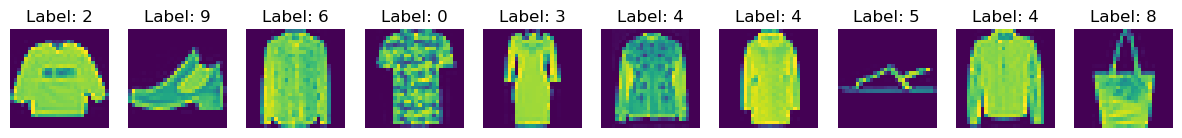

In [33]:

import numpy as np

# 이미지 픽셀값 불러오기
new_dataX = np.load('rgb_images.npy')

# 라벨값 불러오기
labels = np.load('labels.npy')

num_images = len(new_dataX)

# Plot a sample of images
sample_size = 10
plt.figure(figsize=(15, 3))

for i in range(sample_size):
    plt.subplot(1, sample_size, i + 1)
    plt.imshow(new_dataX[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show() # 라벨 + 색깔 변환한 이미지의 배열 ( 잘 변환된걸 확인할 수 있음 )

# PCA 데이터 분석 

In [34]:
from sklearn.decomposition import PCA
pca = PCA(
    n_components=3136
)

# train_X = pca.fit_transform(new_dataX)
# test_X = pca.fit_transform(test_X)



In [35]:
X_train, test_X, y_train, test_y = train_test_split(new_dataX, labels, test_size=0.2, random_state=42)


# 각 라벨별 정확도 검사 코드 ( 테스트 디폴트 값은 위에걸로 PCA에 대한 정확도만 측정할 거기 때문 ) 
svc = SVC(gamma='scale', kernel='rbf', C=13)
# svc.fit(new_dataX, labels) -> 이렇게 하면 안됨 new_dataX의 차원이 4차원 형식이라 이걸 2차원으로 변경한뒤 SVM을 해줘야 함 


# 2차원으로 펼치기 
flattened_dataX = new_dataX.reshape(new_dataX.shape[0], -1)  
svc.fit(flattened_dataX, labels)


# 정확도를 계산
accuracy = svc.score(test_X, test_y) # 테스트도 2차원으로 펼쳐야함 위에처럼 
print(f"Test accuracy: {accuracy}")


ValueError: Found array with dim 4. SVC expected <= 2.

각 모델별로 파라미터 바꿔보면서 앙상블도 해보고 score 가장 높은거 기록해두기! !


# 하이퍼 파라미터 

# C (Regularization parameter): 

* C는 오차에 대한 페널티를 나타냅니다. 
* C가 작을수록 결정 경계는 매끄럽고 데이터 포인트들 중에서 다수에 맞추려고 할 것입니다. 
* C가 클수록 결정 경계는 데이터 포인트들을 더 정확하게 분류하려고 할 것입니다. 
* 너무 큰 C 값은 과적합을 유발할 수 있습니다.

# gamma (Kernel coefficient): 

* gamma는 결정 경계의 유연성을 제어합니다. 
* gamma 값이 작으면 결정 경계가 더 넓게 형성되고, 크면 더 좁게 형성됩니다. 
* 작은 gamma 값은 모델이 단순해지는 경향이 있지만, 큰 gamma 값은 모델이 훈련 데이터에 더 적합하게 되어 과적합의 위험이 있습니다.

### 1. 선형 커널 (Linear Kernel): kernel='linear'

-> 선형 SVM으로 불립니다. 직선으로 데이터를 분리하는 데 사용됩니다.

### 2. 다항식 커널 (Polynomial Kernel): kernel='poly'

-> 다항식 함수를 사용하여 데이터를 고차원 공간으로 매핑합니다. degree 매개변수로 다항식의 차수를 지정할 수 있습니다.

### 3. 방사 기저 함수 (Radial Basis Function, RBF 또는 Gaussian Kernel): kernel='rbf'

-> 가우시안 함수를 사용하여 데이터를 고차원으로 매핑합니다. gamma 매개변수로 함수의 표준편차를 제어합니다.

### 4. 시그모이드 커널 (Sigmoid Kernel): kernel='sigmoid'

-> 시그모이드 함수를 사용하여 데이터를 고차원으로 매핑합니다.


# 하이퍼 파라미터 조합 sklearn 모듈 


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 조합 찾기 
param_grid = {'C': [1, 2, 4, 8, 16], 'gamma': ['scale']}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=2)
grid_search.fit(train_X, train_y)

print("Best Parameters: ", grid_search.best_params_)

# 최적의 하이퍼파라미터로 모델을 다시 훈련
best_svc = grid_search.best_estimator_
best_svc.fit(train_X, train_y)

# 테스트 데이터에 대한 정확도 확인
accuracy = best_svc.score(test_X, test_y)
print(f"Test accuracy with best parameters: {accuracy}")


# 수동 하이퍼 파라미터 조합 ( 아래 )

1. 같은 gamma = scale 고정 ( 결정 경계 유연성 고정 ) , C값만 다르게 C : 1 ~ 20 

### 하이퍼 파라미터 정의 -> 중간 보고서 1장 

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-13-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0Parameter%EC%99%80-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0Hyper-parameter

In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=1)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.8921


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=2)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9007


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=3)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9045


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=4)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9056


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=5)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9066


In [ ]:
svc = SVCfrom sklearn.decomposition import PCA


pca = PCA().fit(train_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');(gamma='scale', kernel='rbf', C=6)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9073


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=7)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.908


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=8)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9089


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=16)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9092


SVM(C=8) : 0.9089~


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=20)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.909


In [ ]:
svc = SVC(gamma='scale', kernel='rbf', C=32)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9084


svc(C=20) : 0.909

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_X, train_y)

rf_model.score(test_X,test_y)

0.8843

랜덤포레스트 정확도( 트리 개수 100)  : 0.8866

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:

models = [('svm', svc), ('random_forest', rf_model)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

앙상블 모델의 정확도: 0.8945


앙상블 ( 랜덤포레스트 + svm ) (hard voting) : 0.8968

In [ ]:
models = [('svm', svc), ('random_forest', rf_model)]

ensemble_model = VotingClassifier(models, voting='soft')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

AttributeError: predict_proba is not available when  probability=False

앙상블 ( 랜덤포레스트 + svm ) (soft voting) : 

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=100)

# 모델 훈련
logistic_regression_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측
predictions = logistic_regression_model.predict(test_X)

# 정확도 계산
accuracy = (predictions == test_y).mean()
print(f'로지스틱 회귀 모델의 정확도: {accuracy}')

로지스틱 회귀 모델의 정확도: 0.8565


C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 
##### epoch 20 : 0.81,
##### epoch 100 : 0.8544,
##### epoch 150 : 0.8541
##### epoch 250 : 0.8492,
##### epoch 500 : 0.8467,


In [ ]:

models = [('svm', svc), ('random_forest', rf_model), ('logistic_regression', logistic_regression_model)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'3개 모델 앙상블 모델의 정확도: {ensemble_accuracy}')

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3개 모델 앙상블 모델의 정확도: 0.898


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
gb_model.fit(train_X, train_y)

# 테스트 데이터로 예측
y_pred_gb = gb_model.predict(test_X)

# 정확도 평가
accuracy_gb = accuracy_score(test_y, y_pred_gb)
print(f'그라디언트 부스팅 모델의 정확도: {accuracy_gb * 100:.2f}%')

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(use_label_encoder=False,objective="multi:softmax",eval_metric="merror")
xgb.fit(train_X,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# 테스트 데이터로 예측
y_pred_xgb = xgb.predict(test_X)

# 정확도 평가
accuracy_xgb = accuracy_score(test_y, y_pred_xgb)
print(f'xgboost  모델의 정확도: {accuracy_xgb}  ')

xgboost  모델의 정확도: 0.9063  


In [ ]:

models = [('svm', svc), ('xgb', xgb)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

앙상블 모델의 정확도: 0.9098


In [ ]:

models = [('svm', svc),('randomforest', rf_model), ('xgb', xgb)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

앙상블 모델의 정확도: 0.9103


In [ ]:

models = [('svm', svc),('randomforest', rf_model), ('xgb', xgb),('lr',logistic_regression_model)]

ensemble_model = VotingClassifier(models, voting='hard')

# 앙상블 모델 훈련
ensemble_model.fit(train_X, train_y)

# 앙상블 모델 평가
ensemble_accuracy = ensemble_model.score(test_X, test_y)
print(f'앙상블 모델의 정확도: {ensemble_accuracy}')

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앙상블 모델의 정확도: 0.9045


In [ ]:
svc = SVC(gamma='scale',kernel='rbf',C=8)

cv_results = cross_validate(svc, train_X, train_y, cv=3)

print(f"Validation acc for each fold: {cv_results['test_score']}")
print(f"Mean acc:  {mean(cv_results['test_score'])}")